In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/foodhub_order.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
# Overview of the dataset's shape and datatypes
shape = df.shape
datatypes = df.dtypes

# Generate a statistical summary
stat_summary = df.describe(include='all')

# Check for missing values
missing_values = df.isnull().sum()

shape, datatypes, stat_summary, missing_values


((1898, 9),
 order_id                   int64
 customer_id                int64
 restaurant_name           object
 cuisine_type              object
 cost_of_the_order        float64
 day_of_the_week           object
 rating                    object
 food_preparation_time      int64
 delivery_time              int64
 dtype: object,
             order_id    customer_id restaurant_name cuisine_type  \
 count   1.898000e+03    1898.000000            1898         1898   
 unique           NaN            NaN             178           14   
 top              NaN            NaN     Shake Shack     American   
 freq             NaN            NaN             219          584   
 mean    1.477496e+06  171168.478398             NaN          NaN   
 std     5.480497e+02  113698.139743             NaN          NaN   
 min     1.476547e+06    1311.000000             NaN          NaN   
 25%     1.477021e+06   77787.750000             NaN          NaN   
 50%     1.477496e+06  128600.000000         

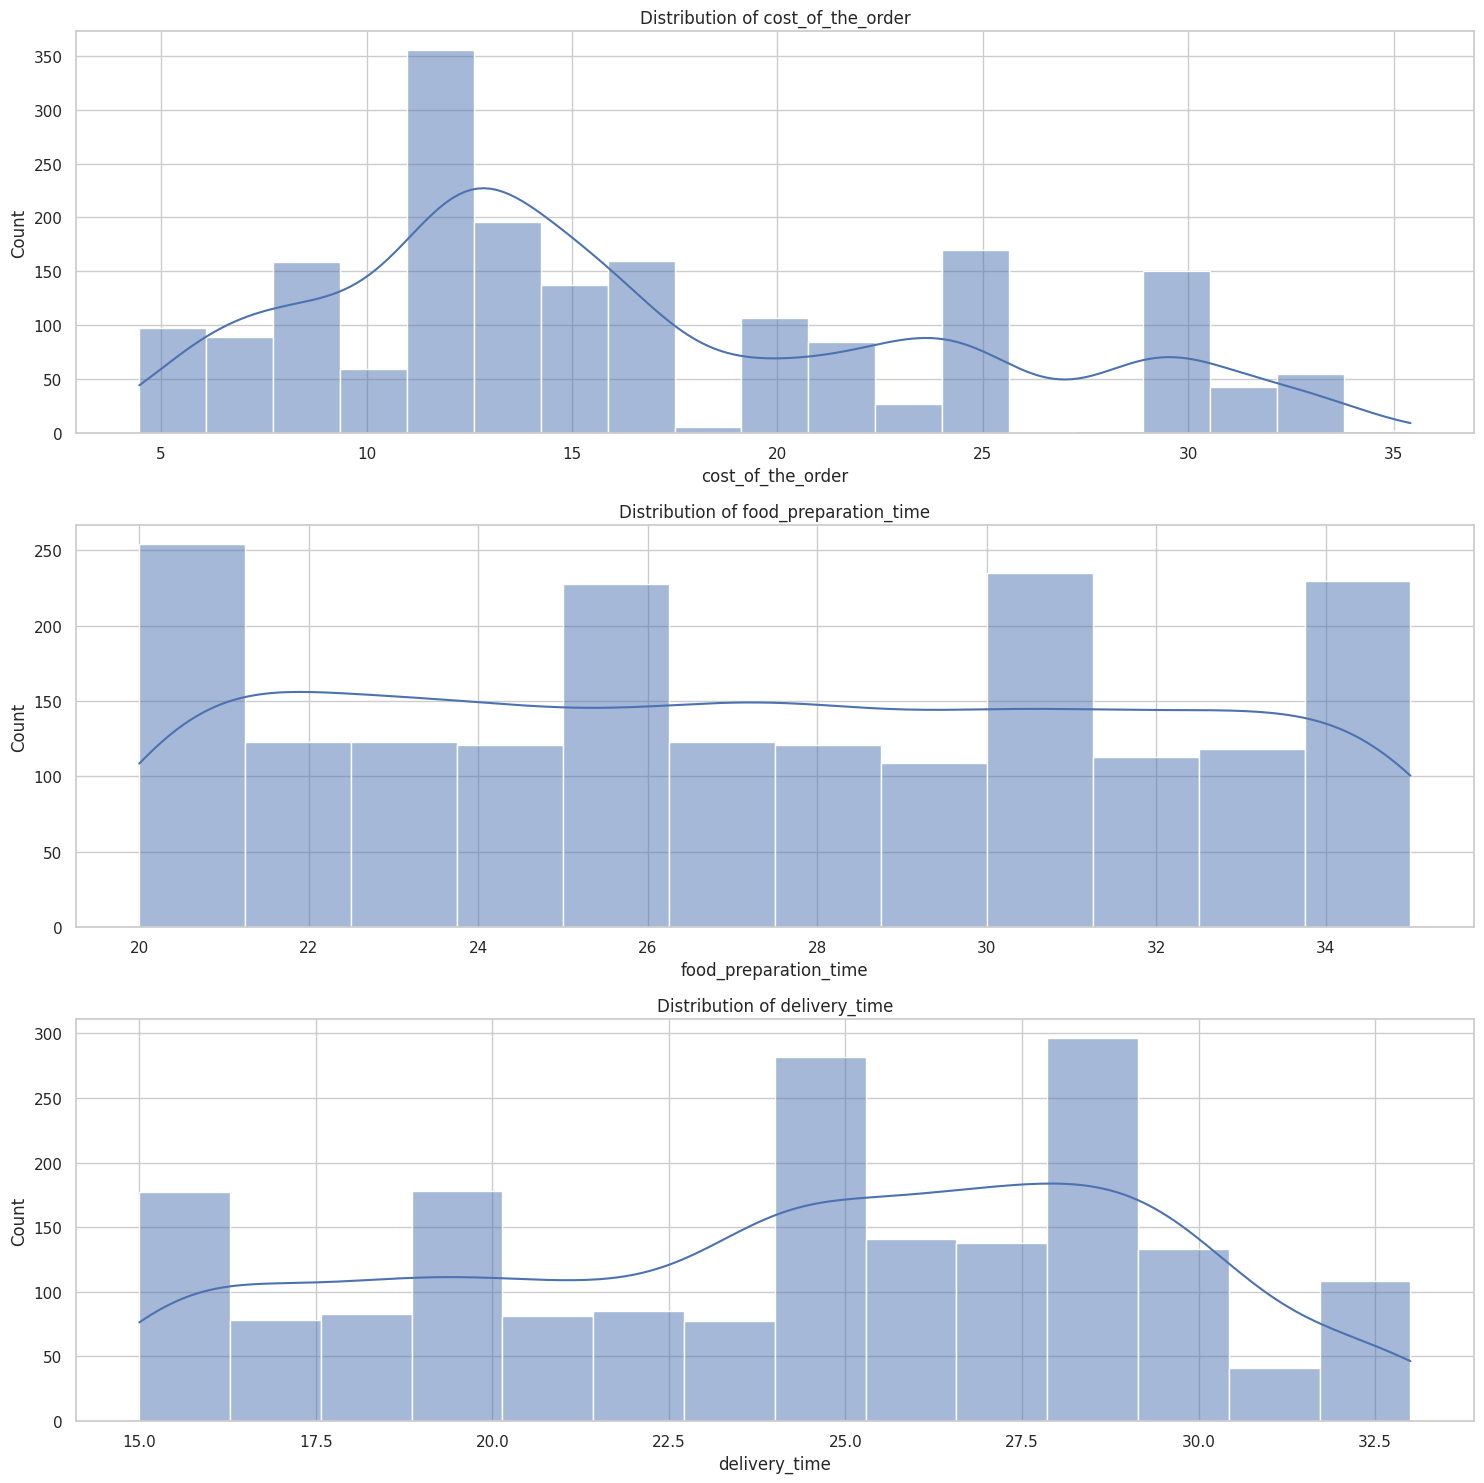

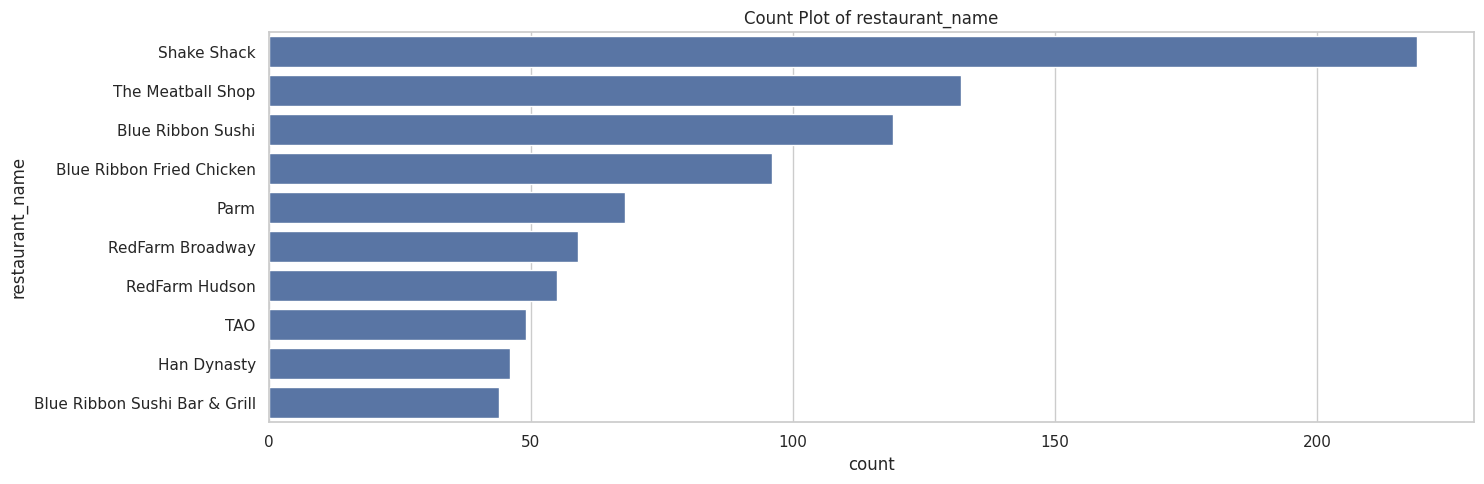

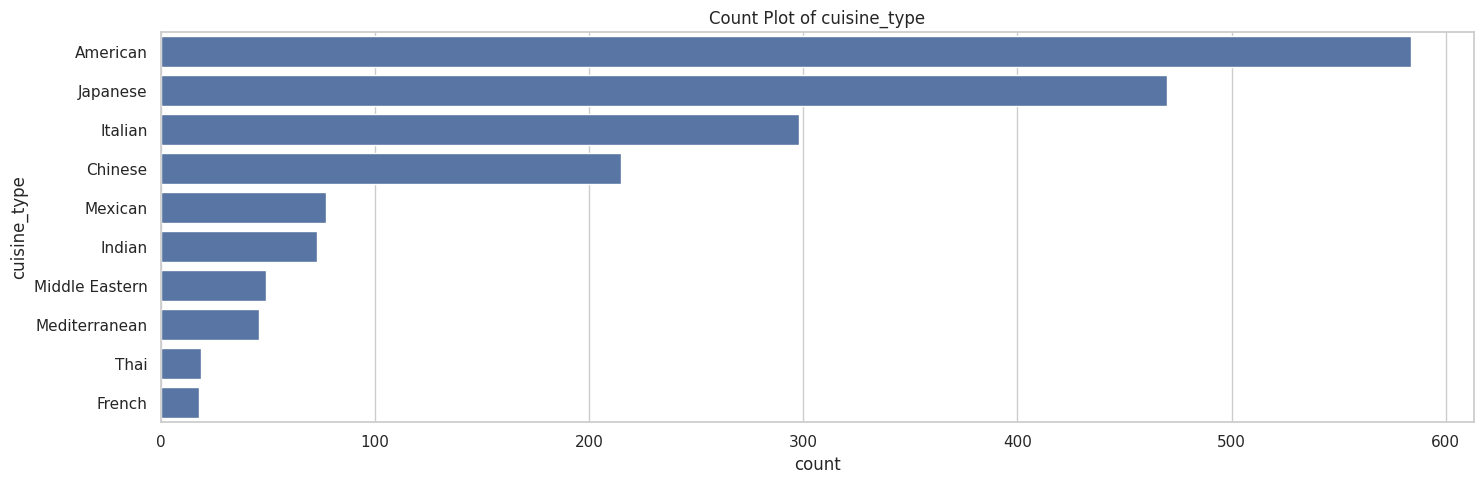

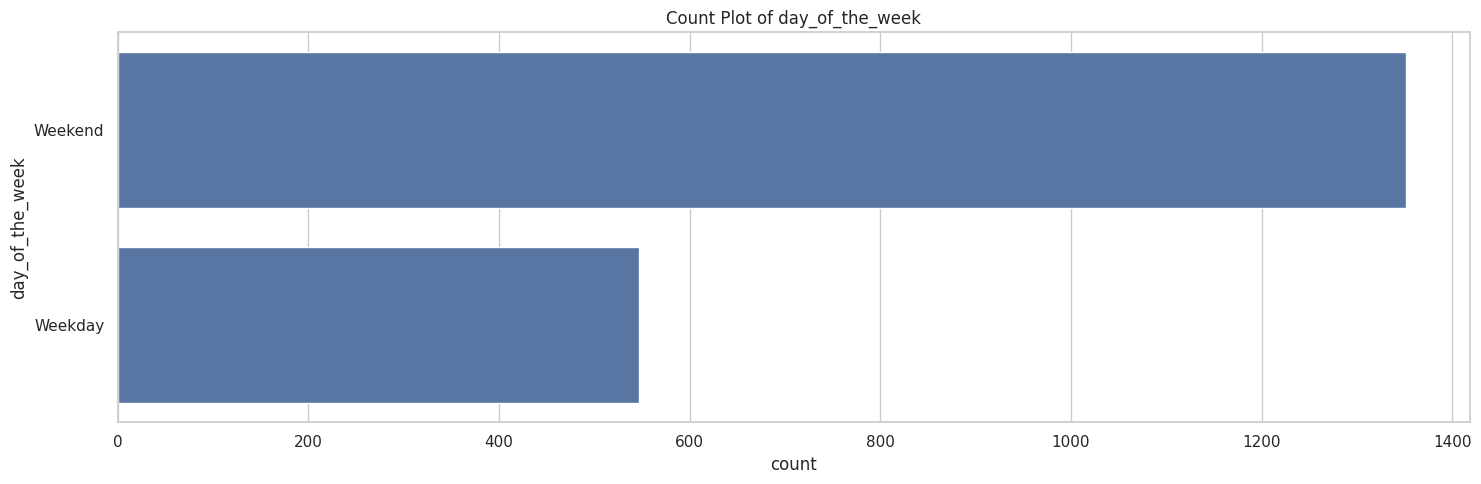

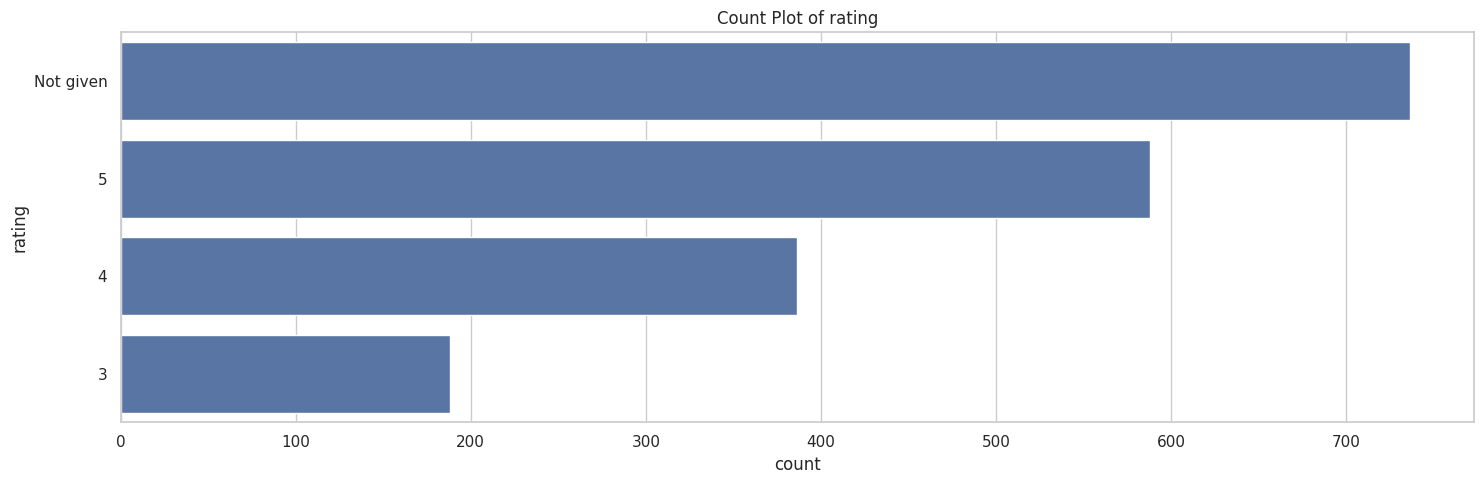

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# List of numerical and categorical columns
numerical_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
categorical_cols = ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']

# Function to plot distributions for numerical columns
def plot_numerical_distributions(df, columns):
    plt.figure(figsize=(15, 5 * len(columns)))
    for i, col in enumerate(columns):
        plt.subplot(len(columns), 1, i + 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# Function to plot count plots for categorical columns
def plot_categorical_counts(df, columns):
    plt.figure(figsize=(15, 5 * len(columns)))
    for i, col in enumerate(columns):
        plt.subplot(len(columns), 1, i + 1)
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f'Count Plot of {col}')
    plt.tight_layout()
    plt.show()

# Plotting numerical distributions
plot_numerical_distributions(df, numerical_cols)

# Plotting categorical counts (limiting to top 10 for better visualization)
for col in categorical_cols:
    if df[col].nunique() > 10:
        top_values = df[col].value_counts().nlargest(10).index
        plot_categorical_counts(df[df[col].isin(top_values)], [col])
    else:
        plot_categorical_counts(df, [col])


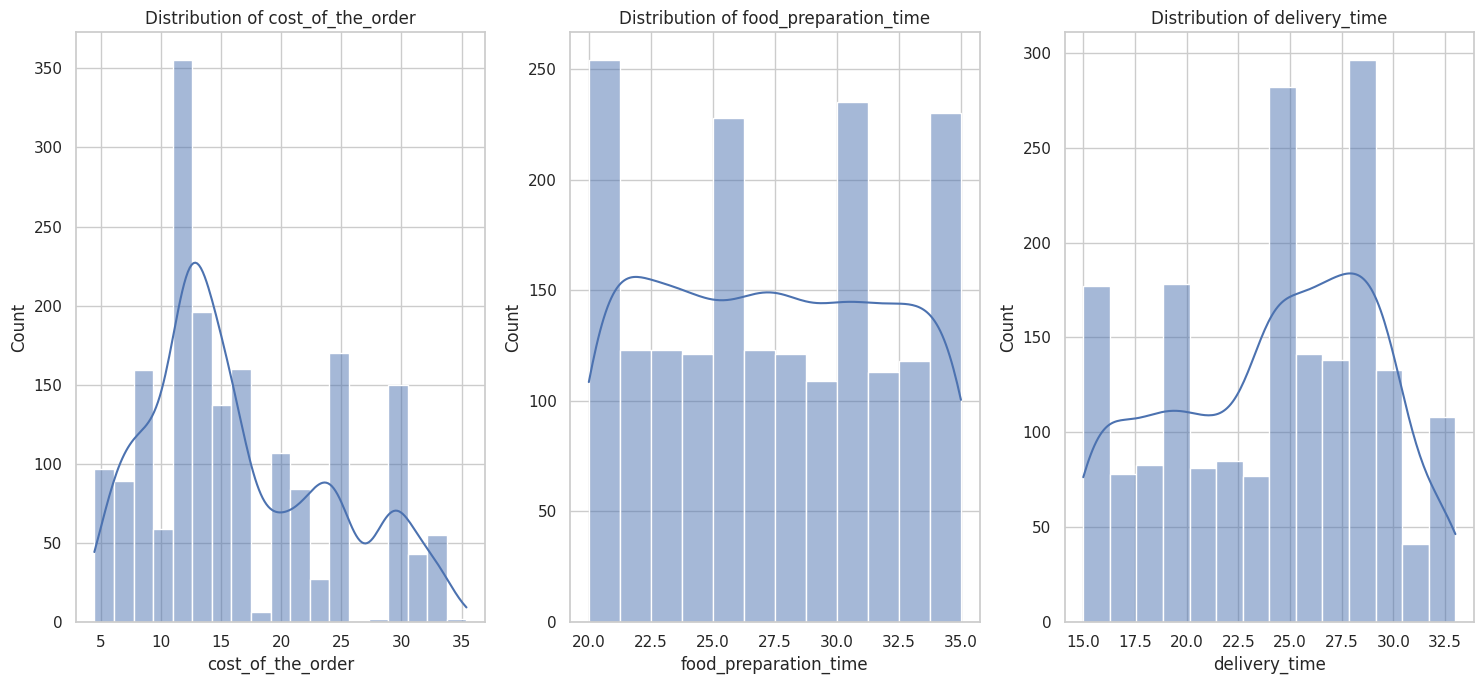

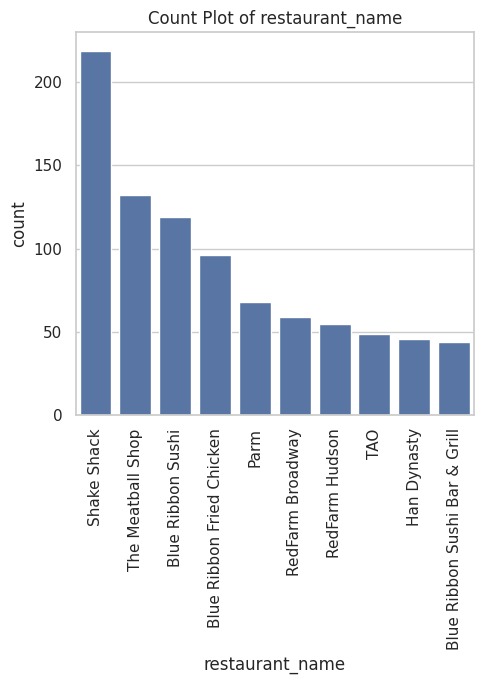

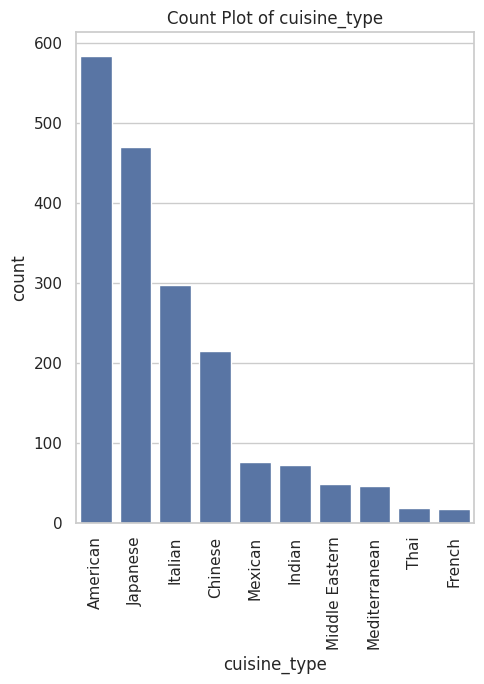

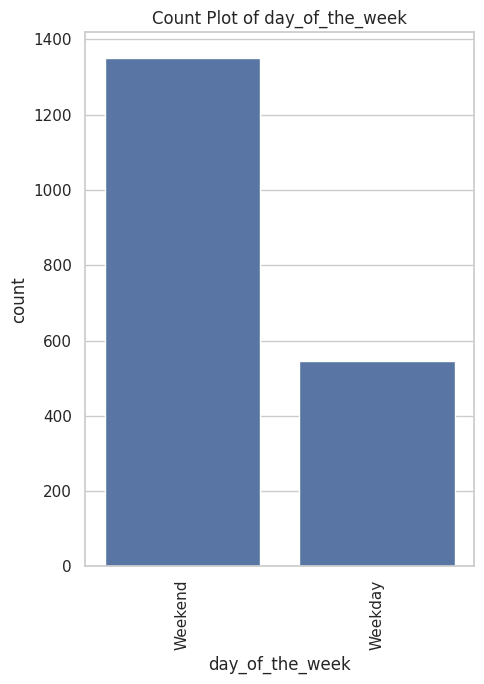

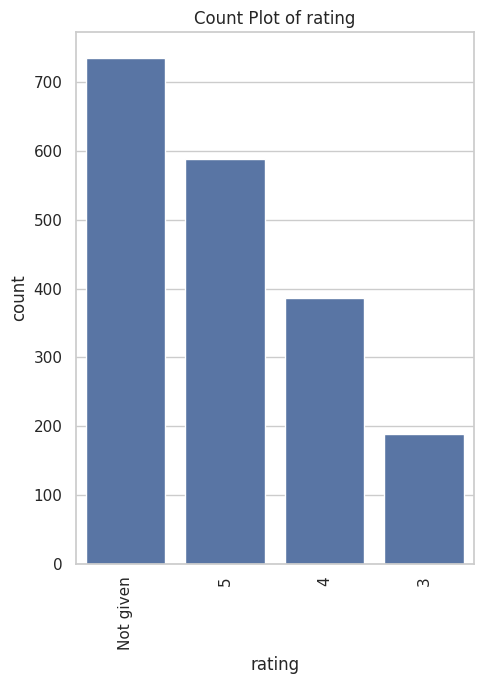

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Function to plot distributions for numerical columns (vertical)
def plot_numerical_distributions(df, columns):
    plt.figure(figsize=(5 * len(columns), 7))
    for i, col in enumerate(columns):
        plt.subplot(1, len(columns), i + 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# Function to plot count plots for categorical columns (vertical)
def plot_categorical_counts(df, columns):
    plt.figure(figsize=(5 * len(columns), 7))
    for i, col in enumerate(columns):
        plt.subplot(1, len(columns), i + 1)
        sns.countplot(x=df[col], order=df[col].value_counts().index)
        plt.title(f'Count Plot of {col}')
        plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Plotting numerical distributions
plot_numerical_distributions(df, numerical_cols)

# Plotting categorical counts (limiting to top 10 for better visualization)
for col in categorical_cols:
    if df[col].nunique() > 10:
        top_values = df[col].value_counts().nlargest(10).index
        plot_categorical_counts(df[df[col].isin(top_values)], [col])
    else:
        plot_categorical_counts(df, [col])


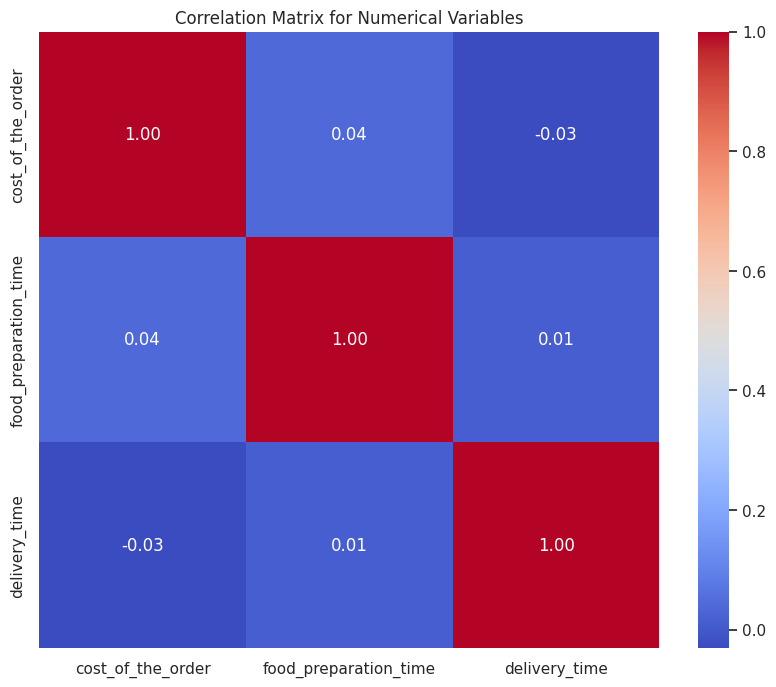

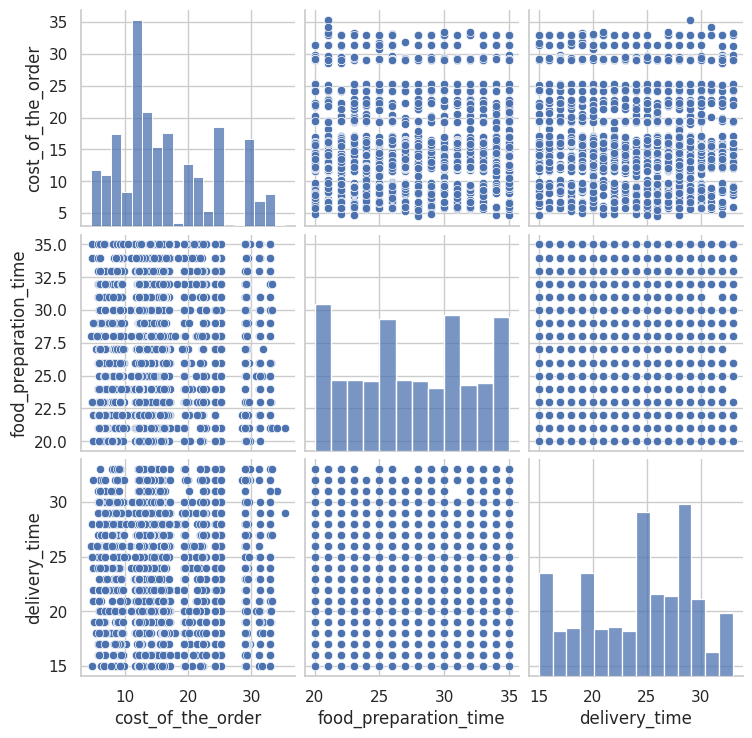

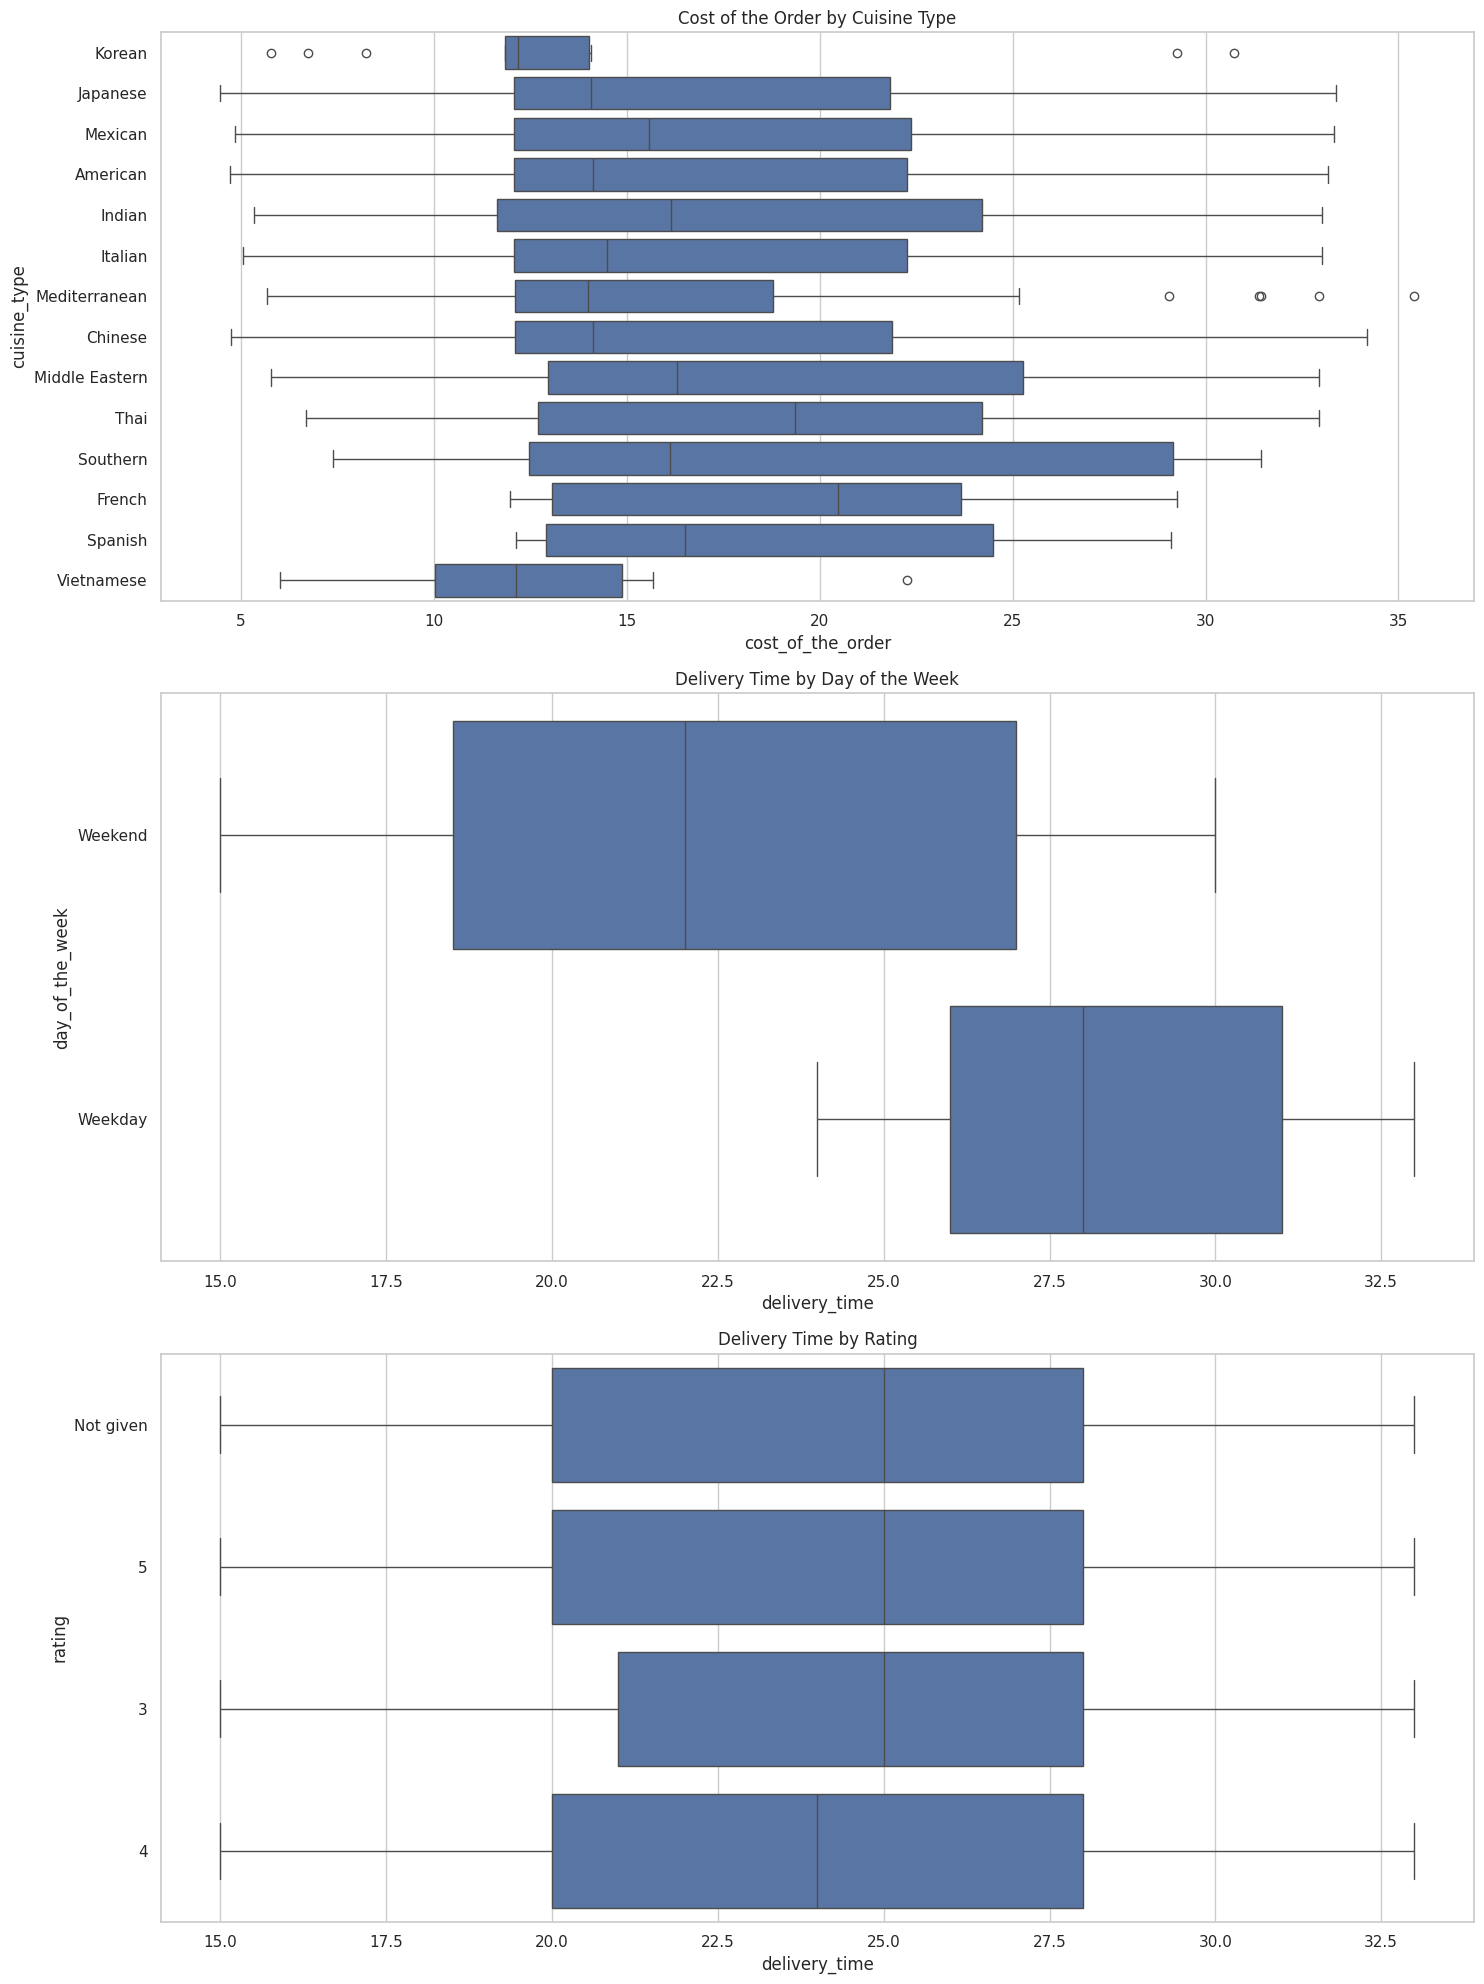

In [ ]:
# Multivariate Data Analysis

# Correlation matrix for numerical variables
correlation_matrix = df[numerical_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Numerical Variables")
plt.show()

# Pairplot for numerical variables to see relationships
sns.pairplot(df[numerical_cols])
plt.show()

# Boxplots to explore relationships between categorical and numerical variables
plt.figure(figsize=(15, 20))

# Relationship between cuisine type and cost of the order
plt.subplot(3, 1, 1)
sns.boxplot(x='cost_of_the_order', y='cuisine_type', data=df)
plt.title('Cost of the Order by Cuisine Type')

# Relationship between day of the week and delivery time
plt.subplot(3, 1, 2)
sns.boxplot(x='delivery_time', y='day_of_the_week', data=df)
plt.title('Delivery Time by Day of the Week')

# Relationship between rating and delivery time
plt.subplot(3, 1, 3)
sns.boxplot(x='delivery_time', y='rating', data=df)
plt.title('Delivery Time by Rating')

plt.tight_layout()
plt.show()
